In [ ]:
from google.colab import drive 
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import numpy as np
import os
import cv2 as cv

people = ['BanTinh','BanTruc','BanDuy',]  
dir_train = '/content/drive/MyDrive/Video' 
dir_test = '/content/drive/MyDrive/Video'
listpath = []
y_train = []
x_train = []
x_test = []
y_test = []

# Tạo dữ liệu
def create_data(dir, x_train, y_train):
  for i in people:
    path = os.path.join(dir,i)
    index_label = people.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(250,250))      
      img = img_to_array(img)
      img = img.reshape(250,250,3) #hàm reshape phải có cùng độ phân giải với target_size 
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)

create_data(dir_train, x_train, y_train) #tạo dữ liệu 

# xử lí dữ liệu
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train, 10)
print(x_train.shape) 
print(y_train.shape)

model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(27,48),activation='relu', kernel_initializer='he_uniform',
                 padding='same',
                 input_shape=(250,250,3),
                 strides=(9,16)))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=64,
                 kernel_size=(27,48), 
                 activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(512, activation='relu',input_shape=(691200,), name='layer1')) #691200=360x640
model.add(Dense(1028, activation='relu', name='layer2'))
model.add(Dense(1028, activation='relu', name='layer3'))
model.add(Dense(10, activation='softmax', name='layer4'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 10)



(887, 250, 250, 3)
(887, 10)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 16, 32)        124448    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 8, 32)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 8, 64)         2654272   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1792)              0         
                                                                 
 layer1 (Dense)            

array([2])

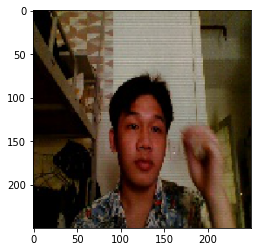

In [ ]:
pic = image.load_img('/content/DUY_1_1.jpg', target_size=(250,250)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,250,250,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
#['BanTinh','BanTruc','BanDuy']


array([0])

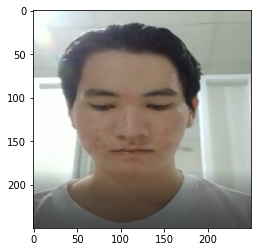

In [ ]:
pic = image.load_img('/content/2.png', target_size=(250,250)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,250,250,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
#['BanTinh','BanTruc','BanDuy']

array([1])

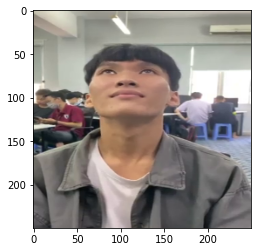

In [ ]:
pic = image.load_img('/content/BanTruc_0040.bmp', target_size=(250,250)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,250,250,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
#['BanTinh','BanTruc','BanDuy']